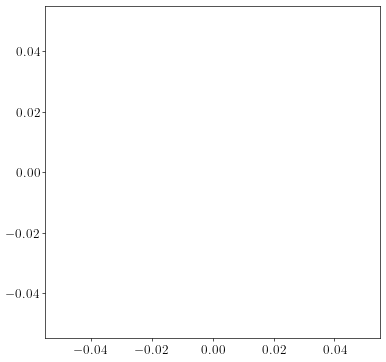

In [1]:
import os
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, Latex, HTML
import json
from utils import Insurance, Savings
from utils import cbeq, polyeq, term, is_divisible, Number
from matplotlib import pyplot as plt
rng = np.random.default_rng(5411)

plt.plot()

SMALL_SIZE = 14
MEDIUM_SIZE = 16
LARGE_SIZE = 18
HUGE_SIZE = 20

plt.rcdefaults()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = MEDIUM_SIZE
plt.rcParams['axes.titlesize'] = LARGE_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
plt.rcParams['figure.titlesize'] = LARGE_SIZE
plt.rcParams['figure.figsize'] = [7.2, 7.2]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 0.0)

JSON_FILE = "../assets/data/wk13_practice.json"
IMAGE_PATH = "../assets/images/wk13"
probs = []
nprob = 0

In [2]:
for i in range(30):
    K = rng.integers(2,6)
    X = rng.integers(0,11,size=K)
    numers = rng.integers(1,K,size=K)
    denom = np.sum(numers)
    p = numers/denom
    setup = fr"""
A random variable \(X\) can take on the following values:

$$\begin{{align}}
"""
    for k in range(K):
        setup += fr"x_{k+1} &= {X[k]:g} \\"
    setup += fr"""
\end{{align}}$$

with probabilities:

$$\begin{{align}}
"""
    for k in range(K):
        setup += fr"p_{k+1} &= {Number(numers[k],denom).as_frac(inline=True,rmplus=True)} \\"
    setup += fr"""
\end{{align}}$$

Calculate the expected value of \(X\).
"""
    EX = np.sum(p*X)
    solution = fr"""
$$E[X] = {EX:g}$$
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))


30


In [3]:
df = pd.read_csv("Insurance_examples.csv")
idx1 = df['fun']=='ln'
idx2 = df['fun']=='sqrt'
mydf = pd.concat([
    df.loc[idx1].sample(20,random_state=rng),
    df.loc[idx2].sample(20,random_state=rng)
])
for idx, row in mydf.iterrows():
    params = dict(row).copy()
    prob = Insurance(params)
    sol = prob.sol
    setup = prob.setup()
    setup += fr"""
<p>1. Calculate the expected value of \(X\).</p>
<p>2. Calculate the expected utility.</p>
<p>3. Calculate the certainty equivalent of \(X\).</p>
<p>4. How much is this person willing to pay to avoid the risk of the problem?<p>
<p>5. How much would it cost a risk-neutral insurance company to insure the individual against the risk of the problem?</p>
"""
    solution = fr"""
$$E[X] = {sol['EW']:,g} $$
$$E[u(X)] = {sol['EU']:,g} $$
$$CE = {sol['CE']:,g} $$
$$WTP = {sol['WTP']:,g} $$
$$Cost = {sol['FairCost']:,g} $$
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))    

70


In [4]:
for i in range(10):
    T = rng.integers(5,101)
    beta = rng.choice([0.85, 0.9, 0.95, 0.98, 0.99])
    x = rng.choice([100,200,300,500,1000,2000,10000,15000,20000])
    PV = ((1 - beta**(T+1))/(1-beta) - 1)*x
    setup = fr"""
Calculate the present value of a promise to receive \(\${x:,g}\) per year for {T:g} years when the discount factor is \(\beta = {beta:g}\).
"""
    solution = fr"""
$${PV:,g}$$
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))

80


In [5]:
for i in range(10):
    beta = rng.choice([0.85, 0.9, 0.95, 0.98, 0.99])
    x = rng.choice([100,200,300,500,1000,2000,10000,15000,20000])
    PV = beta/(1-beta)*x
    setup = fr"""
Calculate the present value of a promise to receive \(\${x:,g}\) per year for eternity when the discount factor is \(\beta = {beta:g}\).
"""
    solution = fr"""
$${PV:,g}$$
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))

90


In [6]:
for i in range(20):
    beta = rng.choice([0.85, 0.9, 0.95, 0.98, 0.99])
    T = rng.integers(3,7)
    X = rng.integers(0,11,size=T)
    PV = 0
    for t in range(T):
        PV+=beta**(t+1) * X[t]
    setup = fr"""
Calculate the present value of a promise to receive the following stream of payments, \(x_t\), when the discount factor is \(\beta = {beta:g}\):

$$\begin{{align}}
"""
    for t in range(T):
        setup += fr"x_{t+1} &= {X[t]:g} \\"
    setup += fr"""
\end{{align}}$$
"""
    solution = fr"""
$${PV:,g}$$
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))

110


In [7]:
df = pd.read_csv("Savings_examples.csv")
idx1 = df['fun']=='ln'
idx2 = df['fun']=='sqrt'
mydf = pd.concat([
    df.loc[idx1].sample(20,random_state=rng),
    df.loc[idx2].sample(20,random_state=rng)
])
for idx, row in mydf.iterrows():
    params = dict(row).copy()
    prob = Savings(params)
    sol = prob.sol
    fun, Y, p, beta = params['fun'], params['Y'], params['p'], params['beta']
    if fun=='ln':
        myfun = fr"\ln c_t"
        myfunc1 = fr"\ln c_1"
        myfunc2 = fr"\ln c_2"
    elif fun=='sqrt':
        myfun = fr"\sqrt{{c_t}}"
        myfunc1 = fr"\sqrt{{c_1}}"
        myfunc2 = fr"\sqrt{{c_2}}"
    setup = fr"""
<p>An individual lives for two periods. In period 1, he earns an income of \(Y={Y:,g}\). In period 2, he earns no income. In order to consume in period 2, the person must buy bonds in period 1. A bond promises to pay \(\$1\) per bond in period 2, and the price of a bond in period 1 is \(p={p:g}\).</p>

<p>The individual gets utility from consuming in each period. If he consumes a dollar amount \(c_t\) in period \(t\), the utility he gets is \(u(c_t) = {myfun}\).</p>

<p>The individual's objective is to maximize his present value of time-discounted utility:

$$ {myfunc1} + \beta {myfunc2} $$

where \(\beta = {beta:g}\).</p>
"""    
    setup += fr"""
<p>1. Calculate how much the person will consume in each period.</p>
<p>2. How many bonds does the person buy in period 1?</p>
<p>3. Calculate the interest rate on bonds.</p>
"""
    solution = fr"""
$$c_1 = {sol['c1']:,g}$$
$$c_2 = {sol['c2']:,g}$$
$$b_1 = {sol['c2']:,g}$$
$$r = {sol['r']:g}$$
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))    

150


In [8]:
with open(JSON_FILE, 'w') as f:
    json.dump(probs, f)

In [9]:
with open(JSON_FILE, 'r') as f:
    myprobs = json.load(f)

In [11]:
prob = np.random.choice(myprobs)
display(HTML(prob['setup']))
display(HTML(prob['solution']))